In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import os, numpy as np


mapa_image = Image.open(os.path.join('mapas_Brasil', 'taxaPerCapitaRouboCarros.png'))


mapa_array = np.array(mapa_image)

In [2]:
def highlight_regions_by_theft_rate_corrected(theft_rate, mapa_array, min_rate=0, max_rate=300):
    # Normalizar a taxa de roubo para o intervalo [0, 255]
    normalized_theft_rate = 255 * (theft_rate - min_rate) / (max_rate - min_rate)

    # Criar uma máscara para as regiões que correspondem à taxa de roubo
    mask = (np.abs(mapa_array - normalized_theft_rate) < 5) & (mapa_array != 255) # não é branco(fundo)

    # Criar uma imagem RGB
    highlighted_image = np.stack([mapa_array] * 3, axis=-1)

    # Destacar as regiões em vermelho
    highlighted_image[mask] = [255, 0, 0]

    return highlighted_image



# encontra os valores presentes no mapa

In [3]:
# Converter os valores da imagem para taxas de roubo
theft_rates = (mapa_array / 255) * (300)

# Obter taxas de roubo únicas presentes na imagem
unique_theft_rates = np.unique(theft_rates)
unique_theft_rates

array([  0.        ,  51.76470588, 117.64705882, 164.70588235,
       247.05882353, 300.        ])

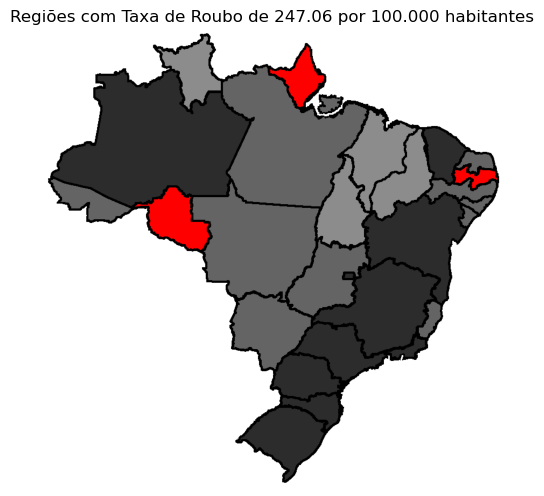

In [4]:
highlighted_map_150 = highlight_regions_by_theft_rate_corrected(247.06, mapa_array)

plt.figure(figsize=(6, 6))
plt.imshow(highlighted_map_150)
plt.title('Regiões com Taxa de Roubo de 247.06 por 100.000 habitantes')
plt.axis('off')
plt.show()